# Exploratory Data Analysis
### Stock Prices Data
### Stock OHLC Data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf  # https://github.com/matplotlib/mplfinance Plot financial data
import seaborn as sns

from datetime import datetime as dt
import datetime
from fetch_data import *


In [2]:
# Get data from our API
prices_data = fetchPriceData(id='bitcoin', vs_currency='usd')
ohlc_data = fetchCandleData(id='bitcoin', vs_currency='usd')

prices_data['time'] = pd.to_datetime(prices_data['time'])
ohlc_data['time'] = pd.to_datetime(ohlc_data['time'])

In [3]:
print(prices_data.head())

         prices   market_caps  total_volumes                time        date
0  50057.226533  9.396123e+11   9.004536e+10 2021-05-14 01:07:01  2021-05-14
1  50095.884025  9.385851e+11   8.682874e+10 2021-05-14 02:01:00  2021-05-14
2  49636.688723  9.286810e+11   8.397694e+10 2021-05-14 03:02:32  2021-05-14
3  49203.985695  9.205884e+11   8.128488e+10 2021-05-14 04:01:51  2021-05-14
4  49152.042131  9.196187e+11   8.160250e+10 2021-05-14 05:01:54  2021-05-14


In [4]:
print(ohlc_data.head())

                 time      open      high       low     close        date
0 2021-06-28 04:00:00  34696.00  34696.00  34445.70  34477.20  2021-06-28
1 2021-06-28 08:00:00  34547.50  34547.50  34429.27  34534.68  2021-06-28
2 2021-06-28 12:00:00  35171.13  35171.13  34249.49  34249.49  2021-06-28
3 2021-06-28 16:00:00  34152.18  34537.96  34152.18  34389.18  2021-06-28
4 2021-06-28 20:00:00  34940.94  34940.94  34189.04  34221.80  2021-06-28


In [5]:
## OHLC data is for around 30 days, and Prices data is for around 75 days due to API constraints
print(prices_data['time'].max() - prices_data['time'].min())
print(ohlc_data['time'].max() - ohlc_data['time'].min())

74 days 22:53:58
30 days 00:00:00


In [28]:
# Highest and Lowest price of bitcoin during the time
print(prices_data['prices'].max())
print(prices_data['prices'].min())

print((prices_data['prices'].max() - prices_data['prices'].min()) / prices_data['prices'].min() * 100)
# So, in just 75 days, bitcoin price fluctuated by 75.8%

51253.26526154562
29154.732122236706
75.79741445284644


In [9]:
prices_data.set_index(['time'], inplace=True)
ohlc_data.set_index(['time'], inplace=True)

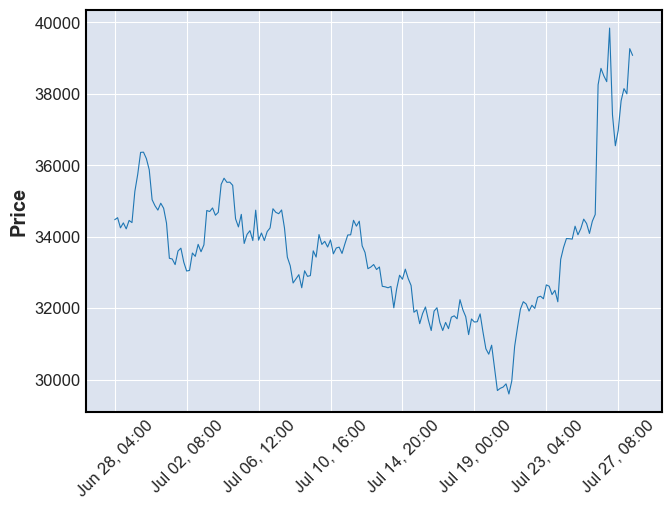

In [10]:
mpf.plot(ohlc_data, type='line')
# The price of bitcoin is rising since the past week

In [16]:
# Group by date to analyze daily data
prices_daily = prices_data.copy().groupby(['date']).first()
ohlc_daily = ohlc_data.copy().groupby(['date']).first()

In [23]:
prices_daily.index = pd.to_datetime(prices_daily.index)
ohlc_daily.index = pd.to_datetime(ohlc_daily.index)


In [17]:
percent_change = (prices_daily.iloc[-1]['prices'] - prices_daily.iloc[-7]['prices']) / prices_daily.iloc[-7]['prices'] * 100
print(percent_change)
# Percent rise from last week's price to today's price - 20% 

20.928985353044


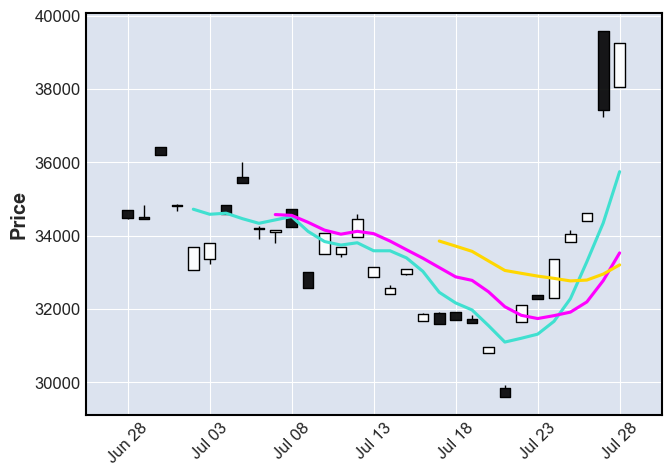

In [26]:
# let's see the moving averages to see where the price is going now
## we will plot mav of 5, 10, 20
mpf.plot(ohlc_daily, type='candle', mav=[5, 10, 20])

# we can observe that the data trend is upwards and price will keep on increasing unless faced with resistance